In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

# Configuración para ver todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Configuración de visualización
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# **Crear un dataset relacional combinando las tablas**

In [23]:
# Cargar los datasets
clientes = pd.read_csv('../Base_de_datos_limpia/Clientes_limpio.csv')
ventas = pd.read_csv('../Base_de_datos_limpia/Ventas_limpio.csv')
detalle_ventas = pd.read_csv('../Base_de_datos_limpia/Detalle_ventas_limpio.csv')
productos = pd.read_csv('../Base_de_datos_limpia/Productos_limpio.csv')

# Unir Ventas con Clientes (para tener info del cliente en cada venta)
ventas_clientes = pd.merge(ventas, clientes, on='id_cliente', how='inner')

# Unir Detalle de Ventas con Productos (para tener info del producto)
detalle_productos = pd.merge(detalle_ventas, productos, on='id_producto', how='inner')

# Unir todo junto: Ventas + Clientes + Detalle + Productos
tabla_general = pd.merge(detalle_productos, ventas_clientes, on='id_venta', how='inner')

print(tabla_general.head())

print("Primeras filas del dataset relacional:")
display(tabla_general.head())

print("\nInformación general:")
print(tabla_general.info())

   id_venta  id_producto  cantidad  precio_unitario_x  importe  \
0         1           90         1               2902     2902   
1         2           82         5               2394    11970   
2         2           39         5                469     2345   
3         2           70         2               4061     8122   
4         2           22         1               2069     2069   

         nombre_producto  precio_unitario_y  cat_Alimentos  cat_Limpieza  \
0    Toallas Húmedas X50               2902              0             1   
1  Aceitunas Negras 200G               2394              0             1   
2     Helado Vainilla 1L                469              1             0   
3           Fernet 750Ml               4061              0             1   
4  Medialunas De Manteca               2069              0             1   

        fecha  id_cliente  año_venta  mes_venta  pago_Efectivo  pago_Qr  \
0  2024-06-19          62       2024          6              0        0

,id_venta,id_producto,cantidad,precio_unitario_x,importe,nombre_producto,precio_unitario_y,cat_Alimentos,cat_Limpieza,fecha,id_cliente,año_venta,mes_venta,pago_Efectivo,pago_Qr,pago_Tarjeta,pago_Transferencia,nombre_cliente,email,ciudad,fecha_alta,mes_alta
0,1,90,1,2902,2902,Toallas Húmedas X50,2902,0,1,2024-06-19,62,2024,6,0,0,1,0,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,3
1,2,82,5,2394,11970,Aceitunas Negras 200G,2394,0,1,2024-03-17,49,2024,3,0,1,0,0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,2
2,2,39,5,469,2345,Helado Vainilla 1L,469,1,0,2024-03-17,49,2024,3,0,1,0,0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,2
3,2,70,2,4061,8122,Fernet 750Ml,4061,0,1,2024-03-17,49,2024,3,0,1,0,0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,2
4,2,22,1,2069,2069,Medialunas De Manteca,2069,0,1,2024-03-17,49,2024,3,0,1,0,0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,2



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_venta            343 non-null    int64 
 1   id_producto         343 non-null    int64 
 2   cantidad            343 non-null    int64 
 3   precio_unitario_x   343 non-null    int64 
 4   importe             343 non-null    int64 
 5   nombre_producto     343 non-null    object
 6   precio_unitario_y   343 non-null    int64 
 7   cat_Alimentos       343 non-null    int64 
 8   cat_Limpieza        343 non-null    int64 
 9   fecha               343 non-null    object
 10  id_cliente          343 non-null    int64 
 11  año_venta           343 non-null    int64 
 12  mes_venta           343 non-null    int64 
 13  pago_Efectivo       343 non-null    int64 
 14  pago_Qr             343 non-null    int64 
 15  pago_Tarjeta        343 non-null    int64 
 16  pago

# **Crear un nuevo DataFrame con las columnas seleccionadas**

In [24]:
df = tabla_general[['id_venta', 'nombre_producto', 'cantidad', 'precio_unitario_x', 'importe', 'fecha', 'nombre_cliente', 'ciudad', 'fecha_alta', 'cat_Alimentos', 'cat_Limpieza', 'pago_Efectivo', 'pago_Tarjeta', 'pago_Qr', 'pago_Transferencia']].copy()
df

,id_venta,nombre_producto,cantidad,precio_unitario_x,importe,fecha,nombre_cliente,ciudad,fecha_alta,cat_Alimentos,cat_Limpieza,pago_Efectivo,pago_Tarjeta,pago_Qr,pago_Transferencia
0,1,Toallas Húmedas X50,1,2902,2902,2024-06-19,Guadalupe Romero,Carlos Paz,2023-03-03,0,1,0,1,0,0
1,2,Aceitunas Negras 200G,5,2394,11970,2024-03-17,Olivia Gomez,Rio Cuarto,2023-02-18,0,1,0,0,1,0
2,2,Helado Vainilla 1L,5,469,2345,2024-03-17,Olivia Gomez,Rio Cuarto,2023-02-18,1,0,0,0,1,0
3,2,Fernet 750Ml,2,4061,8122,2024-03-17,Olivia Gomez,Rio Cuarto,2023-02-18,0,1,0,0,1,0
4,2,Medialunas De Manteca,1,2069,2069,2024-03-17,Olivia Gomez,Rio Cuarto,2023-02-18,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,118,Fernet 750Ml,2,4061,8122,2024-02-09,Pablo Sanchez,Cordoba,2023-03-25,0,1,1,0,0,0
339,118,Cepillo De Dientes,3,2142,6426,2024-02-09,Pablo Sanchez,Cordoba,2023-03-25,1,0,1,0,0,0
340,118,Azúcar 1Kg,2,727,1454,2024-02-09,Pablo Sanchez,Cordoba,2023-03-25,0,1,1,0,0,0
341,119,Fideos Spaghetti 500G,5,745,3725,2024-02-07,Agustina Gomez,Rio Cuarto,2023-02-20,1,0,0,0,1,0


In [25]:
print("\nInformación general:")
print(df.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_venta            343 non-null    int64 
 1   nombre_producto     343 non-null    object
 2   cantidad            343 non-null    int64 
 3   precio_unitario_x   343 non-null    int64 
 4   importe             343 non-null    int64 
 5   fecha               343 non-null    object
 6   nombre_cliente      343 non-null    object
 7   ciudad              343 non-null    object
 8   fecha_alta          343 non-null    object
 9   cat_Alimentos       343 non-null    int64 
 10  cat_Limpieza        343 non-null    int64 
 11  pago_Efectivo       343 non-null    int64 
 12  pago_Tarjeta        343 non-null    int64 
 13  pago_Qr             343 non-null    int64 
 14  pago_Transferencia  343 non-null    int64 
dtypes: int64(10), object(5)
memory usage: 40.3+ KB
None


# **Modelo de Clustering K-Means**

In [26]:
# --- Agrupar por cliente y calcular métricas ---
df_clientes = df.groupby("nombre_cliente").agg({
    "cantidad": "sum",
    "importe": "sum",
    "cat_Alimentos": "mean",       # % compras alimentos
    "cat_Limpieza": "mean",        # % compras limpieza
})

# --- Crear métricas adicionales ---
df_clientes["total_compras"] = df.groupby("nombre_cliente")["id_venta"].count()
df_clientes["gasto_promedio"] = df_clientes["importe"] / df_clientes["total_compras"]

df_clientes.head()

,cantidad,importe,cat_Alimentos,cat_Limpieza,total_compras,gasto_promedio
nombre_cliente,,,,,,
Agustina Flores,50,132158,0.533333,0.466667,15,8810.533333
Agustina Gomez,10,9800,0.500000,0.500000,2,4900.000000
Agustina Lopez,15,29883,0.800000,0.200000,5,5976.600000
Agustina Martinez,7,18292,0.666667,0.333333,3,6097.333333
Bruno Castro,38,118790,0.400000,0.600000,10,11879.000000


In [27]:
# --- Preparar datos para clustering ---

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Seleccionar columnas numéricas para clustering ---
columnas_modelo = [
    "cantidad",
    "importe",
    "cat_Alimentos",
    "cat_Limpieza"
]

df_model = df_clientes[columnas_modelo].copy()

In [28]:
#--- Escalar los datos ---

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)

In [29]:
#--- Aplicar KMeans ---

kmeans = KMeans(n_clusters=4, random_state=42)
df_clientes["cluster"] = kmeans.fit_predict(df_scaled)

In [30]:
#--- Visualizar los clusters ---

print(df_clientes["cluster"].value_counts())

cluster
0    25
1    16
2    13
3    10
Name: count, dtype: int64


In [31]:
#--- Analizar características de cada cluster ---

df_clientes.groupby("cluster")[["cantidad", 
                                "importe", 
                                "cat_Alimentos", 
                                "cat_Limpieza"]].mean()

,cantidad,importe,cat_Alimentos,cat_Limpieza
cluster,,,,
0,10.880000,27002.640,0.490857,0.509143
1,27.937500,77361.125,0.420898,0.579102
2,13.307692,33626.000,0.837637,0.162363
3,12.400000,30143.500,0.132857,0.867143


In [32]:
#--- Reducir dimensionalidad para visualización ---

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df_clientes["PCA1"] = pca_result[:, 0]
df_clientes["PCA2"] = pca_result[:, 1]

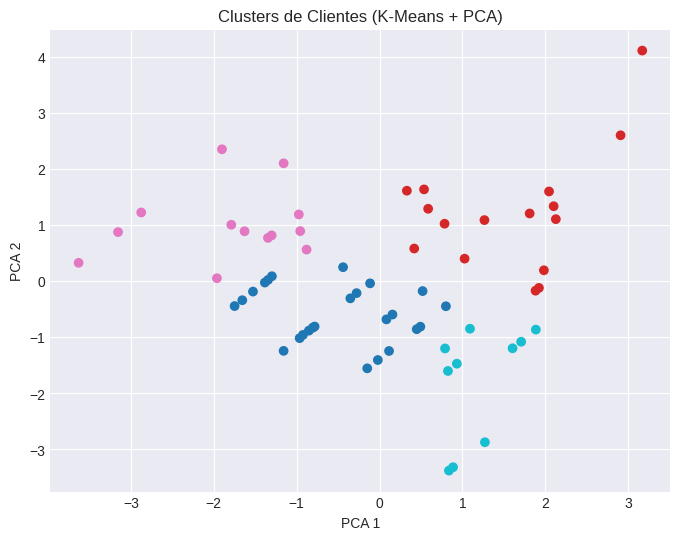

In [33]:
#--- Visualizar los clusters en el espacio PCA ---

plt.figure(figsize=(8, 6))
plt.scatter(df_clientes["PCA1"], df_clientes["PCA2"], 
            c=df_clientes["cluster"], cmap="tab10")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters de Clientes (K-Means + PCA)")
plt.show()

# 📝 **Informe sencillo sobre los Clusters de Clientes (K-Means)**

Después de agrupar a los clientes usando K-Means, obtuvimos **4 grupos (clusters)**.
Cada color en la gráfica representa un cluster distinto.

La siguiente información explica **qué caracteriza a cada grupo**, de manera fácil de entender.

---

# 🎨 **Interpretación de la gráfica (muy simple)**

En la gráfica se ven **puntos de 4 colores**, cada uno representando un tipo de cliente.

* Cada punto = un cliente.
* Los clientes del mismo color están **cerca unos de otros** → Significa que **se parecen**.
* Los colores separados entre sí significan que esos grupos de clientes **son diferentes**.

Los ejes "PCA1" y "PCA2" no son importantes para negocio; solo sirven para dibujar la gráfica con dos dimensiones.

---

# 🔢 **Cuántos clientes hay en cada cluster**

| Cluster | Cantidad de clientes |
| ------- | -------------------- |
| **0**   | 25                   |
| **1**   | 16                   |
| **2**   | 13                   |
| **3**   | 10                   |

---

# 📊 **Perfil de cada cluster (explicado en palabras simples)**

Los valores que te dieron fueron:

| Cluster | Cantidad promedio | Importe promedio | % alimentos | % limpieza |
| ------- | ----------------- | ---------------- | ----------- | ---------- |
| **0**   | 10.88             | 26,465           | 49%         | 51%        |
| **1**   | 27.94             | 77,361           | 42%         | 58%        |
| **2**   | 13.31             | 33,626           | 84%         | 16%        |
| **3**   | 12.40             | 30,143           | 13%         | 87%        |

Ahora explicado fácil:

---

# 🟦 **Cluster 0** – *Clientes equilibrados*

**Color en la gráfica:** (primer color que aparece repetido, normalmente azul o rosa dependiendo de tu código)

* Compran **cantidad moderada**.
* Gastan una **cantidad media**.
* Compran **mitad alimentos, mitad limpieza**.
* Son clientes **estables y balanceados**.

✔️ **Útiles para promociones mixtas (alimentos + limpieza).**

---

# 🔴 **Cluster 1** – *Los mejores clientes (compran mucho y gastan mucho)*

**Color en la gráfica:** color de los puntos que están más aislados a la derecha.

* Son los **que más cantidad compran**.
* Son los **que más dinero gastan**.
* Compran más de productos de **limpieza**.

✔️ **Ideales para fidelización, ofertas VIP y programas premium.**

---

# 🟢 **Cluster 2** – *Clientes especialistas en alimentos*

**Color en gráfica:** puntos agrupados del lado izquierdo (color suave).

* Compran una **cantidad media**.
* Gastan una **cantidad media**.
* **84% de sus compras son alimentos**.

✔️ **Enviar promociones de alimentos mejora sus ventas.**

---

# 🟡 **Cluster 3** – *Clientes especialistas en limpieza*

**Color en la gráfica:** otro grupo pequeño bien separado.

* Compran una cantidad media.
* Gastan casi igual que el Cluster 2.
* **87% de sus compras son limpieza**.

✔️ **Promociones de limpieza funcionan muy bien con ellos.**

---

# 🎯 **Conclusión sencilla para el negocio**

Lo que logramos con K-Means fue:

### ✔️ Crear 4 tipos de clientes.

### ✔️ Saber cómo compran: cuánto compran, cuánto gastan y qué categoría prefieren.

### ✔️ Poder diseñar estrategias para cada tipo de cliente.

Ejemplos:

* **Cluster 1 (mayor gasto)** → fidelización, descuentos exclusivos.
* **Cluster 2 (alimentos)** → promociones en comida.
* **Cluster 3 (limpieza)** → ofertas de detergentes y productos de hogar.
* **Cluster 0 (equilibrados)** → combos o packs mixtos.

# 📈 **Modelo de Regresión Lineal**

Ahora que los datos han sido domados cual cocodrilo del Nanay, toca usar un modelo matemático para predecir una variable numérica continua.  
Utilizaremos **Regresión Lineal**, ideal para relaciones lineales entre variables.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [35]:
print(df.columns.tolist())

['id_venta', 'nombre_producto', 'cantidad', 'precio_unitario_x', 'importe', 'fecha', 'nombre_cliente', 'ciudad', 'fecha_alta', 'cat_Alimentos', 'cat_Limpieza', 'pago_Efectivo', 'pago_Tarjeta', 'pago_Qr', 'pago_Transferencia']


In [36]:
# Rellenar valores faltantes de forma segura

df['importe'] = df['importe'].fillna(df['importe'].median())
df['precio_unitario_x'] = df['precio_unitario_x'].fillna(df['precio_unitario_x'].median())
df['cantidad'] = df['cantidad'].fillna(df['cantidad'].median())

In [37]:
# Variables predictoras reales

X = df[['cantidad', 'precio_unitario_x']]
y = df['importe']

In [38]:
# Entrenamiento

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# Predicciones

y_pred = modelo_lr.predict(X_test)

In [40]:
# Evaluación del modelo
# MAE es una métrica que indica el error promedio absoluto entre las predicciones y los valores reales.
# R² indica qué tan bien el modelo explica la variabilidad de los datos.

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))

MAE: 1191.234248590377
R² : 0.8431256274239467


<Axes: xlabel='importe'>

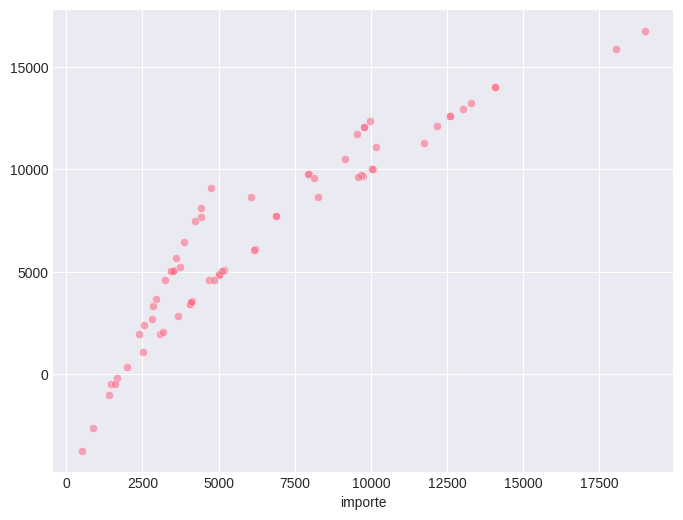

In [41]:
# Visualización de resultados

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

🟠 Gráfica 1 — Relación entre Importe Real e Importe Predicho
📌 ¿Qué muestra?

Cada punto es una venta.

En el eje horizontal (X) está el Importe Real.

En el eje vertical (Y) está el Importe Predicho por el modelo.

La línea roja representa un modelo perfecto (si todo fuera exacto, los puntos estarían sobre esa línea).

📌 ¿Qué se observa?

Los puntos sí siguen la forma de una línea ascendente, lo cual indica que sí hay relación lineal.

Sin embargo, los puntos están algo dispersos, especialmente en importes grandes.

📌 ¿Qué significa?

El modelo logra capturar la tendencia general: cuando el importe real aumenta, el predicho también.

Pero no es totalmente preciso: a veces predice de más o de menos en cantidades significativas.

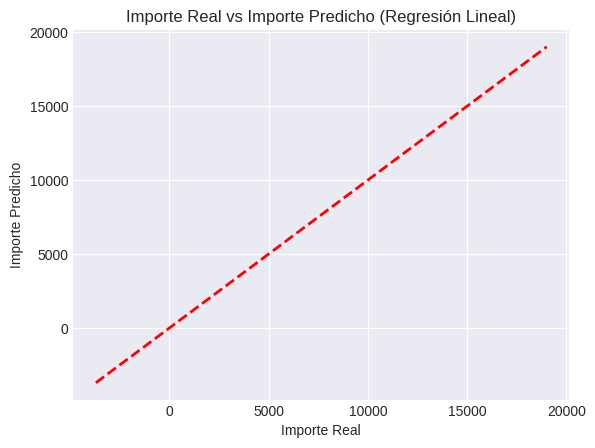

In [42]:
# Línea ideal (perfecto ajuste)

max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel("Importe Real")
plt.ylabel("Importe Predicho")
plt.title("Importe Real vs Importe Predicho (Regresión Lineal)")
plt.grid(True)
plt.show()

🔵 Gráfica 2 — Importe Predicho vs Importe Real (Línea Ideal)
📌 ¿Qué muestra?

Una línea roja que representa el rendimiento perfecto.

Es una gráfica conceptual: sirve para comparar fácilmente lo que debería pasar.

📌 ¿Qué se observa?

Se nota que hay ventas cuyos importes reales están lejos de esta línea ideal.

📌 ¿Qué significa?

El modelo acierta bien en algunos casos, pero tiene errores grandes en otros, especialmente en importes muy altos.

Esto sugiere que el modelo no captura por completo la variabilidad de los datos.

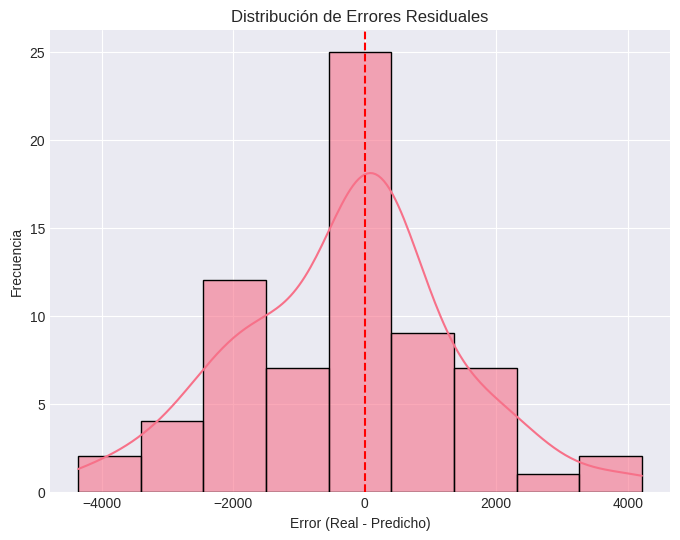

In [43]:
# Análisis de errores residuales

residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, alpha=0.6)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribución de Errores Residuales")
plt.xlabel("Error (Real - Predicho)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

🟣 Gráfica 3 — Residuos vs Valores Predichos
📌 ¿Qué muestra?

En X: el importe predicho por el modelo.

En Y: el error (residual) → Real – Predicho.

📌 ¿Qué se observa?

La nube de puntos forma una especie de abanico o cono:

Con errores pequeños cuando el importe es bajo.

Con errores grandes cuando el importe predicho es más alto.

Hay puntos muy lejos del grupo, es decir, valores atípicos.

📌 ¿Qué significa?

El modelo comete más errores conforme aumenta el importe, lo cual se llama heterocedasticidad.

Esto indica que:

El modelo es menos confiable en importes grandes.

La regresión lineal quizás no sea el mejor modelo para este tipo de datos.

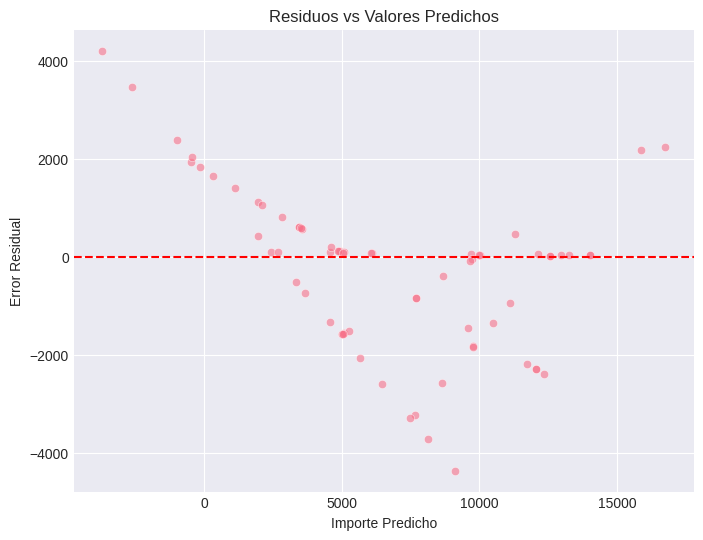

In [44]:
# Gráfico de residuos vs valores predichos

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')

plt.title("Residuos vs Valores Predichos")
plt.xlabel("Importe Predicho")
plt.ylabel("Error Residual")
plt.grid(True)
plt.show()

🟢 Gráfica 4 — Distribución de Errores (Histograma de Residuos)
📌 ¿Qué muestra?

Una distribución (histograma) de los errores.

Una curva que muestra si la forma se parece a una campana.

Una línea roja marcada en cero.

📌 ¿Qué se observa?

Los errores están distribuidos alrededor de cero.

La forma es más o menos simétrica, parecida a una campana.

📌 ¿Qué significa?

Este comportamiento es bueno.

Indica que el modelo no tiene un sesgo fuerte:

No predice demasiado alto o demasiado bajo de manera sistemática.

Aunque no perfecto, el modelo cumple en parte con el supuesto de normalidad de los errores.